# 네이버 쇼핑 리뷰 감정 분석
**주제:** 네이버 쇼핑몰 리뷰 플랫폼에서 다양한 쇼핑몰 리뷰를 모아, 감정 및 형태소 분석을 시행 

**주제 선정 이유:** 소비자 감정을 분석하는 프로젝트를 시행해보고 싶었습니다. B2B 해외 영업을 하면서 항상 실사용자의 feedback이 궁금했기에, 직접 소비자 리뷰를 취합하여 감정 분석을 시행하고 싶었습니다. 

**데이터 선정 이유:** 크롤링하여 데이터를 취합하는 것부터, 레이블링까지 진행하여 조금 더 다양한 형태의 데이터를 다루어보고 싶었습니다. 


### 1. Crawling
- 네이버 쇼핑  'LG전자 시네빔 PH550'의 리뷰를 crawling

### 2. Preprocessing 
- 불용어 제거(1)
- 불용어 제거(2)
- Vectorize
- Padding
- 긍/부정 리뷰 분류 

### 3. LSTM Modeling
- BiLSTM
- Result 

### 4. 한계점


# 2. Preprocessing

In [5]:
!pip install konlpy
!pip install imblearn
!pip install tweepy==3.10.0

In [234]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

df = pd.read_csv("output.csv")

In [235]:
df.shape

(1933, 5)

In [236]:
df.head()

,Unnamed: 0,type,category,review,star
0,1,LG전자 시네빔 PH550,별점,캠핑장에서 쓸 빔프로젝터 구입해볼까 결심하고 참 많은 상품 장바구니에 담아놓고 오랜...,평점5
1,2,LG전자 시네빔 PH550,별점,일주일동안 고민하다가 그냥 처음 입문하는 건데 너무 비싸지도 않고 그렇다고 너무 싸...,평점5
2,3,LG전자 시네빔 PH550,별점,결혼과 동시에 해보고 싶은게 집에서 빔으로 영화 보는것인데 10년 지나서야 이루게 ...,평점5
3,4,LG전자 시네빔 PH550,별점,중국산 빔을 썼었습니다. 워낙 가격차가 커서 정말 얼마나 오래 고민했는지 몰라요. ...,평점5
4,5,LG전자 시네빔 PH550,별점,안녕하세요 영화보는걸 좋아해서 늘 티비랑 노트북을 연결해서 보았었습니다(티비43인치...,평점5


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1933 non-null   int64 
 1   type        1933 non-null   object
 2   category    1933 non-null   object
 3   review      1933 non-null   object
 4   star        1933 non-null   object
dtypes: int64(1), object(4)
memory usage: 75.6+ KB


In [238]:
df['star'][1] #평점 제거 전

'평점5'

In [239]:
df['star'] = df['star'].str.replace("평점", "")

In [240]:
df['star'][1] #평점 제거 후 

'5'

In [241]:
df['star'] = pd.to_numeric(df['star'])

In [242]:
df['star'][1] #object => numeric 

5

### 불용어 제거 (1)

In [243]:
#text data를 기계가 분석이 가능한 vector로 정리 한 후 LSTM 모델로 분류

In [244]:
df['review'][1]

'일주일동안 고민하다가 그냥 처음 입문하는 건데 너무 비싸지도 않고 그렇다고 너무 싸지도 않은 대기업 제품 사자 싶어 제일 유명한 ph550 골랐습니다. 출시년도가 좀 오래된 게 마음에 걸렸지만요.와 그런데 웬걸.. 물건 사고나서 처음 사용하는데 감동 먹은 건 처음이었습니다. 제가 전자제품을 정말 좋아하는데 뭔가 로망을 하나 달성했다는 감격이 올라오면서 눈물이 나드라구요.. 화질도 정말 좋고 잘 나오고 인터페이스도 편리하게 되어 있어서 좋고.. 저는 아이폰 유저인데 다행히 그램노트북을 갖고 있어서 호환에도 문제가 없구요..대신에 아이폰만 달랑 들고 계신 사람이라면 조금 아쉬울 수도 있겠다는 생각이 들긴 합니다. 크롬 캐스트 필요하실듯.. 블루투스 스피커 싼 거 하나 장만하셔서 (볼륨 조절 되는 걸로 사야합니다. 내장 스피커 자체가 볼륨이 작아서..) 보시면 정말 삶의 질이 올라가는거 느끼실 수 있을거에요.참고로 밑에 사진은 직접 찍은 건데 하나는 제 방 블라인드고, 하나는 천장입니다. 벽에서 블라인드까지 2m 안되구요, 천장도 그렇게 높지 않은데 정말 쨍쨍하고 잘 나옵니다.. 또 한 번 삶의 질 상승!'

In [245]:
df.head()

,Unnamed: 0,type,category,review,star
0,1,LG전자 시네빔 PH550,별점,캠핑장에서 쓸 빔프로젝터 구입해볼까 결심하고 참 많은 상품 장바구니에 담아놓고 오랜...,5
1,2,LG전자 시네빔 PH550,별점,일주일동안 고민하다가 그냥 처음 입문하는 건데 너무 비싸지도 않고 그렇다고 너무 싸...,5
2,3,LG전자 시네빔 PH550,별점,결혼과 동시에 해보고 싶은게 집에서 빔으로 영화 보는것인데 10년 지나서야 이루게 ...,5
3,4,LG전자 시네빔 PH550,별점,중국산 빔을 썼었습니다. 워낙 가격차가 커서 정말 얼마나 오래 고민했는지 몰라요. ...,5
4,5,LG전자 시네빔 PH550,별점,안녕하세요 영화보는걸 좋아해서 늘 티비랑 노트북을 연결해서 보았었습니다(티비43인치...,5


In [246]:
#불용어 제거(1) 함수를 만든 이후 전체 데이터 셋에 적용
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    text = re.sub("\n", " ", string=text) # '\n' 제거
    return text   

# 리뷰에 불용어 제거 
df['review_'] = df['review'].apply(lambda x: clean_str(x))
df.head()
#reference: https://stackoverflow.com/questions/31661307/python-regex-remove-n

,Unnamed: 0,type,category,review,star,review_
0,1,LG전자 시네빔 PH550,별점,캠핑장에서 쓸 빔프로젝터 구입해볼까 결심하고 참 많은 상품 장바구니에 담아놓고 오랜...,5,캠핑장에서 쓸 빔프로젝터 구입해볼까 결심하고 참 많은 상품 장바구니에 담아놓고 오랜...
1,2,LG전자 시네빔 PH550,별점,일주일동안 고민하다가 그냥 처음 입문하는 건데 너무 비싸지도 않고 그렇다고 너무 싸...,5,일주일동안 고민하다가 그냥 처음 입문하는 건데 너무 비싸지도 않고 그렇다고 너무 싸...
2,3,LG전자 시네빔 PH550,별점,결혼과 동시에 해보고 싶은게 집에서 빔으로 영화 보는것인데 10년 지나서야 이루게 ...,5,결혼과 동시에 해보고 싶은게 집에서 빔으로 영화 보는것인데 10년 지나서야 이루게 ...
3,4,LG전자 시네빔 PH550,별점,중국산 빔을 썼었습니다. 워낙 가격차가 커서 정말 얼마나 오래 고민했는지 몰라요. ...,5,중국산 빔을 썼었습니다 워낙 가격차가 커서 정말 얼마나 오래 고민했는지 몰라요 ...
4,5,LG전자 시네빔 PH550,별점,안녕하세요 영화보는걸 좋아해서 늘 티비랑 노트북을 연결해서 보았었습니다(티비43인치...,5,안녕하세요 영화보는걸 좋아해서 늘 티비랑 노트북을 연결해서 보았었습니다 티비43인치...


In [247]:
df['review'][500] #불용어 제거 전

'코로나로 넷플릭스 없이 살 수 없게 되었는데 삶의 질을 올릴 수 있는 가전제품이예요...!'

In [248]:
df['review_'][500]  #불용어 제거 성공

'코로나로 넷플릭스 없이 살 수 없게 되었는데 삶의 질을 올릴 수 있는 가전제품이예요    '

In [249]:
#불용어 제거 성공 확인 후 기존 review 삭제 
del df['review']

### 불용어 제거 (2)

#### 형태소 단위로 추출
- 위에서는 한글로 전처리를 진행, 아래에서는 Konlp 파일을 통해 형태소 단위로 추출 후, 데이터 셋에 맞는 불용어 제거 

In [250]:
#!pip install konlpy
# konlpy 다운로드 후 실행 매우 어렵고.. 까다롭다..
# reference: https://blog.naver.com/ji5623ku2/222493586479
# reference: https://blog.naver.com/masonmount323/222500708493

In [251]:
import nltk
import konlpy
from konlpy.tag import Okt; t=Okt()  #오픈 소스 한국어 분석기

In [252]:
# Konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출
def get_pos(x):
    pos = t.pos(x) #pos 형태소와 품사 추출/ nouns 명사만 추출/ morphs 형태소만 추출
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 test
result1 = get_pos(df['review_'][1])
print(result1)

['일주일/Noun', '동안/Noun', '고민/Noun', '하다가/Verb', '그냥/Noun', '처음/Noun', '입문/Noun', '하는/Verb', '건데/Eomi', '너무/Adverb', '비싸지도/Adjective', '않고/Verb', '그렇다고/Conjunction', '너무/Adverb', '싸지도/Verb', '않은/Verb', '대기업/Noun', '제품/Noun', '사자/Noun', '싶어/Verb', '제일/Noun', '유명한/Adjective', 'ph/Alpha', '550/Number', '골랐습니다/Verb', '출시/Noun', '년도/Noun', '가/Josa', '좀/Noun', '오래된/Adjective', '게/Noun', '마음/Noun', '에/Josa', '걸렸지만/Verb', '요/Noun', '와/Verb', '그런데/Conjunction', '웬걸/Noun', '물건/Noun', '사고나서/Verb', '처음/Noun', '사용/Noun', '하는데/Verb', '감동/Noun', '먹은/Verb', '건/Noun', '처음/Noun', '이었습니다/Verb', '제/Noun', '가/Josa', '전자제품/Noun', '을/Josa', '정말/Noun', '좋아하는데/Adjective', '뭔가/Noun', '로망/Noun', '을/Josa', '하나/Noun', '달성/Noun', '했다는/Verb', '감격/Noun', '이/Josa', '올라오면서/Verb', '눈물/Noun', '이/Josa', '나드라구/Noun', '요/Josa', '화질/Noun', '도/Josa', '정말/Noun', '좋고/Adjective', '잘/Verb', '나오고/Verb', '인터페이스/Noun', '도/Josa', '편리하게/Adjective', '되어/Verb', '있어서/Adjective', '좋고/Adjective', '저/Noun', '는/Josa', '아이폰/Noun', '유저/Noun', '인

In [253]:
#df.to_csv('token_output.csv', encoding='utf-8-sig', mode='w')

형태소 단위로 분리해서 count를 세는 것을 목적으로 하여 리뷰 하나하나마다 진행하기보다는, 여러 리뷰들을 하나의 리스트 원소로 합쳐서 형태소를 분리한 뒤 Counter 객체로 빈도수를 확인하고자 한다

In [254]:
words = " ".join(df['review_'].tolist())
words = t.morphs(words)
print('총 단어 수:', len(words))

총 단어 수: 47786


In [255]:
from collections import Counter
frequent1 = Counter(words).most_common()
frequent1

[('도', 1332),
 ('이', 1202),
 ('에', 953),
 ('화질', 647),
 ('잘', 596),
 ('너무', 551),
 ('배송', 501),
 ('가', 487),
 ('좋아요', 437),
 ('은', 407),
 ('사용', 391),
 ('빔', 372),
 ('으로', 369),
 ('을', 359),
 ('는', 327),
 ('로', 307),
 ('제품', 292),
 ('구매', 288),
 ('생각', 274),
 ('에서', 270),
 ('스크린', 241),
 ('고민', 220),
 ('입니다', 219),
 ('보다', 216),
 ('좋고', 213),
 ('스피커', 210),
 ('요', 209),
 ('영화', 204),
 ('것', 201),
 ('좋네요', 199),
 ('했는데', 194),
 ('들', 193),
 ('좋습니다', 193),
 ('만족합니다', 192),
 ('한', 189),
 ('집', 189),
 ('같아요', 180),
 ('정말', 179),
 ('를', 176),
 ('화면', 175),
 ('하고', 174),
 ('빠르고', 171),
 ('가격', 160),
 ('연결', 153),
 ('안', 150),
 ('영화관', 147),
 ('다', 147),
 ('크기', 139),
 ('좋은', 136),
 ('정도', 128),
 ('해서', 127),
 ('감사합니다', 125),
 ('합니다', 124),
 ('더', 124),
 ('때', 124),
 ('의', 123),
 ('블루투스', 122),
 ('소리', 122),
 ('고', 120),
 ('아주', 120),
 ('네', 115),
 ('좀', 114),
 ('캠핑', 113),
 ('만족', 105),
 ('저', 100),
 ('바로', 99),
 ('수', 98),
 ('과', 98),
 ('미러링', 98),
 ('많이', 98),
 ('만', 97),
 ('추천', 94),
 ('구

In [256]:
remove_one_word = [x for x in words if len(x)>1]
print("한 단어 개수 제거 후:", len(remove_one_word))

한 단어 개수 제거 후: 33868


In [257]:
frequent2 = Counter(remove_one_word).most_common() #Counter를 통해 단어별 빈도 확인
frequent2

[('화질', 647),
 ('너무', 551),
 ('배송', 501),
 ('좋아요', 437),
 ('사용', 391),
 ('으로', 369),
 ('제품', 292),
 ('구매', 288),
 ('생각', 274),
 ('에서', 270),
 ('스크린', 241),
 ('고민', 220),
 ('입니다', 219),
 ('보다', 216),
 ('좋고', 213),
 ('스피커', 210),
 ('영화', 204),
 ('좋네요', 199),
 ('했는데', 194),
 ('좋습니다', 193),
 ('만족합니다', 192),
 ('같아요', 180),
 ('정말', 179),
 ('화면', 175),
 ('하고', 174),
 ('빠르고', 171),
 ('가격', 160),
 ('연결', 153),
 ('영화관', 147),
 ('크기', 139),
 ('좋은', 136),
 ('정도', 128),
 ('해서', 127),
 ('감사합니다', 125),
 ('합니다', 124),
 ('블루투스', 122),
 ('소리', 122),
 ('아주', 120),
 ('캠핑', 113),
 ('만족', 105),
 ('바로', 99),
 ('미러링', 98),
 ('많이', 98),
 ('추천', 94),
 ('구입', 93),
 ('삼각대', 92),
 ('선명하고', 91),
 ('상품', 88),
 ('없이', 87),
 ('가성', 86),
 ('보고', 86),
 ('사이즈', 85),
 ('진짜', 84),
 ('최고', 84),
 ('했어요', 82),
 ('선물', 80),
 ('다른', 79),
 ('주문', 79),
 ('영상', 78),
 ('아이폰', 78),
 ('빠른', 78),
 ('역시', 77),
 ('이라', 77),
 ('소음', 76),
 ('완전', 74),
 ('엄청', 74),
 ('하기', 74),
 ('했습니다', 73),
 ('프로젝터', 72),
 ('마음', 72),
 ('조금', 72),
 ('이랑'

한국어 불용어 사이트 참고: https://www.ranks.nl/stopwords/korean

In [332]:
with open('stopwords.txt', 'r') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
print("불용어 제거 후:", len(remove_stopwords))

불용어 제거 후: 28293


In [334]:
frequent3 = Counter(remove_stopwords).most_common()
Frequent = pd.DataFrame(list(zip(frequent1, frequent2, frequent3)), columns=['frequent1', 'frequent2', 'frequent3'])
Frequent.head(20)

#frequent1: 불용어 제거 전 top(20)개의 빈번 단어
#frequent2: 한단어 제거 후 top(20)개의 빈번 단어
#frequent3: 불용어 사전 포함 단어 제거 후 top(20)개의 빈번 단어

,frequent1,frequent2,frequent3
0,"(도, 1332)","(화질, 647)","(화질, 647)"
1,"(이, 1202)","(너무, 551)","(배송, 501)"
2,"(에, 953)","(배송, 501)","(좋아요, 437)"
3,"(화질, 647)","(좋아요, 437)","(사용, 391)"
4,"(잘, 596)","(사용, 391)","(제품, 292)"
5,"(너무, 551)","(으로, 369)","(구매, 288)"
6,"(배송, 501)","(제품, 292)","(생각, 274)"
7,"(가, 487)","(구매, 288)","(스크린, 241)"
8,"(좋아요, 437)","(생각, 274)","(고민, 220)"
9,"(은, 407)","(에서, 270)","(입니다, 219)"


### 함수화하여 전체 데이터 처리

In [261]:
df['review_']

0       캠핑장에서 쓸 빔프로젝터 구입해볼까 결심하고 참 많은 상품 장바구니에 담아놓고 오랜...
1       일주일동안 고민하다가 그냥 처음 입문하는 건데 너무 비싸지도 않고 그렇다고 너무 싸...
2       결혼과 동시에 해보고 싶은게 집에서 빔으로 영화 보는것인데 10년 지나서야 이루게 ...
3       중국산 빔을 썼었습니다  워낙 가격차가 커서 정말 얼마나 오래 고민했는지 몰라요  ...
4       안녕하세요 영화보는걸 좋아해서 늘 티비랑 노트북을 연결해서 보았었습니다 티비43인치...
                              ...                        
1928                        생각보다 너무안보임   크기조절 안되는거 이제알았어요
1929    장점  리모콘으로 컨트롤 되는 것  화질이 썩 좋은 것  영상이나 음질 등을 설정할...
1930    보내주신 프로젝터는 잘 받았습니다  금요일에 주문해서 토요일에 받았구요  Ph550...
1931    삼각대 정말 별로입니다  아무리 맞춰도 수평도 안맞고   빔과 고정도 단단히 안되는...
1932    최악입니다  화질도 별로고 줌아웃 기능도 없어서 거리에 맞춰서 장비를 놔야해서 불편...
Name: review_, Length: 1933, dtype: object

In [262]:
temp = []
for x in df['review_']:
    pos = t.morphs(x) #pos 형태소와 품사 추출/ nouns 명사만 추출/ morphs 형태소만 추출
    pos = [x for x in pos if len(x)>1] # 한글자 제거
    pos = [x for x in pos if x not in stopwords] #stopwords 제거
    temp.append(pos)

In [263]:
#전체 데이터 셋의 말뭉치 
temp

[['캠핑장',
  '프로젝터',
  '구입',
  '해볼까',
  '결심',
  '많은',
  '상품',
  '장바구니',
  '담아놓고',
  '오랜',
  '고민',
  '했습니다',
  '마찬가지',
  '고민',
  '하실',
  '입니다',
  '성능',
  '차이',
  '안나는거',
  '같은데',
  '저렴한',
  '제품',
  '많은',
  '선뜻',
  '결정',
  '하기가',
  '힘들죠',
  '가성',
  '좋다는',
  '가형',
  '제품',
  '대부분',
  '리뷰',
  '만족스러운',
  '후기',
  '위주',
  '올라오기에',
  '변별',
  '크지',
  '않은',
  '같았습니다',
  '게시판',
  '위주',
  '살펴',
  '보니',
  '제품',
  '문제',
  '아쉬운',
  '정보',
  '얻을',
  '있었습니다',
  '1회',
  '제품',
  '아닌',
  '전자제품',
  '구매',
  '하려면',
  '비용',
  '높아도',
  '대기업',
  '제품',
  '사는게',
  '장기',
  '낫겠다는',
  '생각',
  '들었습니다',
  '상품',
  '포장',
  '안전하게',
  '꼼꼼히',
  '되어',
  '왔습니다',
  '추가',
  '구매',
  '필수',
  '키트',
  '저렴한데',
  '필요한',
  '품목',
  '있어서',
  '만족합니다',
  '사진',
  '보시다시피',
  '종류',
  '연결',
  '단자',
  '있습니다',
  '방식',
  '으로도',
  '연결할',
  '있기에',
  '해서',
  '나쁠',
  '없겠죠',
  '사무실',
  '교육장',
  '임시',
  '테스트',
  '해봤는데',
  '주변',
  '밝음에도',
  '좋은',
  '해상도',
  '보였습니다',
  '두운',
  '환경',
  '더할',
  '나위',
  '좋습니다',
  '음향',
  '따로',
  '블루투스',
  '스피커',
  '사용',
  '예정

###  Vectorize


토큰화된 단어를 컴퓨터가 인식할 수 있는 정수인코딩 

In [264]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [335]:
# Tokenizer 정의
max_words = 35000 # 사용할 단어의 max 사이즈 지정 
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(temp) #학습할 문장에 대해 토큰화를 진행해 dic 형태로 변환
X = tokenizer.texts_to_sequences(temp) #문장을 토큰으로 치환
print(X[3])

[444, 2465, 990, 20, 2466, 236, 179, 9, 1220, 1598, 35, 2467, 614, 10, 74, 18, 30, 814, 8, 173, 438, 1599, 70, 371, 36, 2468, 2469, 991, 2470, 709, 180, 1600, 2471, 36, 259, 59, 8, 710, 2472, 607, 1601, 36, 319, 18, 205, 237, 16, 2473, 1602, 1603, 2474, 2475, 2476, 615, 99, 1602, 2477, 1604, 35, 25, 42, 2478, 1605, 345, 545, 275, 2479, 1221, 495, 2480, 89, 2481, 1221, 2482, 28, 2483, 1606, 711, 60, 1222, 487]


In [266]:
type(X)
len(X)

1933

### Padding
서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 패딩 작업을 진행. 이를 위해 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포 확인.

In [267]:
import matplotlib.pyplot as plt

리뷰의 최대 길이 : 237
리뷰의 평균 길이 : 14.63683393688567


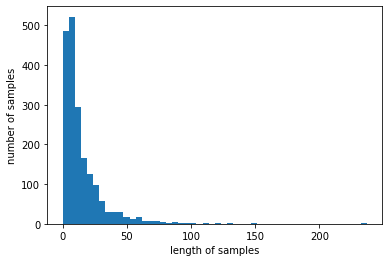

In [268]:
print('리뷰의 최대 길이 :',max(len(x) for x in X))
print('리뷰의 평균 길이 :',sum(map(len, X))/len(X))
plt.hist([len(review) for review in X], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [269]:
# pad_sequence를 활용하여 모든 데이터의 길이를 50으로 통일 
max_len = 50
X = pad_sequences(X, maxlen=max_len, padding='post')
print(X[1])

[ 985  293   45 2429  234 2430  317  540 1216  986 2431    7 2432   27
 2433  808 2434   28   12  442 2435  809   61  204  486   27  118   12
  809   80  810 2436 1588 2437  235   60  541  487  440  488   84   10
  488 2438   84 1589 1590 2439  369  987]


In [270]:
X.shape #변환이 된 벡터, 1933개의 text : 각 100개의 토큰으로 이루어진 것 

(1933, 50)

In [271]:
print(temp[0])
print(X[0])

['캠핑장', '프로젝터', '구입', '해볼까', '결심', '많은', '상품', '장바구니', '담아놓고', '오랜', '고민', '했습니다', '마찬가지', '고민', '하실', '입니다', '성능', '차이', '안나는거', '같은데', '저렴한', '제품', '많은', '선뜻', '결정', '하기가', '힘들죠', '가성', '좋다는', '가형', '제품', '대부분', '리뷰', '만족스러운', '후기', '위주', '올라오기에', '변별', '크지', '않은', '같았습니다', '게시판', '위주', '살펴', '보니', '제품', '문제', '아쉬운', '정보', '얻을', '있었습니다', '1회', '제품', '아닌', '전자제품', '구매', '하려면', '비용', '높아도', '대기업', '제품', '사는게', '장기', '낫겠다는', '생각', '들었습니다', '상품', '포장', '안전하게', '꼼꼼히', '되어', '왔습니다', '추가', '구매', '필수', '키트', '저렴한데', '필요한', '품목', '있어서', '만족합니다', '사진', '보시다시피', '종류', '연결', '단자', '있습니다', '방식', '으로도', '연결할', '있기에', '해서', '나쁠', '없겠죠', '사무실', '교육장', '임시', '테스트', '해봤는데', '주변', '밝음에도', '좋은', '해상도', '보였습니다', '두운', '환경', '더할', '나위', '좋습니다', '음향', '따로', '블루투스', '스피커', '사용', '예정', '사정', '내장', '스피커', '사운드', '영상', '감상', '하시는데', '무리는', '없어', '보입니다', '캠핑장', '에서도', '활용', '있을', '같습니다', '제품', '프로젝터', '역할', '충실하고', '만족스러우니', '사후', '관리', '구성', '고민', '하시는', '속편', '하게', '제품', '구입', '하시는게', '현명한', '선택', '생각', '됩니다'

### 데이터셋 분류
- 평점에서의 1-3점은 '0'으로 부정적인 리뷰로 처리하였고, 4-5점은 '1'로 긍정적인 리뷰로 처리 

In [272]:
# 'sentiment'이라는 새로운 feature 생성 함수
def sentiment(df):
    if df['star'] > 3.0:
        return int(1)
    elif df['star'] <= 3.0:
        return int(0)

df['sentiment'] = df.apply(sentiment, axis=1)
df

,Unnamed: 0,type,category,star,review_,sentiment
0,1,LG전자 시네빔 PH550,별점,5,캠핑장에서 쓸 빔프로젝터 구입해볼까 결심하고 참 많은 상품 장바구니에 담아놓고 오랜...,1
1,2,LG전자 시네빔 PH550,별점,5,일주일동안 고민하다가 그냥 처음 입문하는 건데 너무 비싸지도 않고 그렇다고 너무 싸...,1
2,3,LG전자 시네빔 PH550,별점,5,결혼과 동시에 해보고 싶은게 집에서 빔으로 영화 보는것인데 10년 지나서야 이루게 ...,1
3,4,LG전자 시네빔 PH550,별점,5,중국산 빔을 썼었습니다 워낙 가격차가 커서 정말 얼마나 오래 고민했는지 몰라요 ...,1
4,5,LG전자 시네빔 PH550,별점,5,안녕하세요 영화보는걸 좋아해서 늘 티비랑 노트북을 연결해서 보았었습니다 티비43인치...,1
...,...,...,...,...,...,...
1928,3,LG전자 시네빔 PH550,별점,2,생각보다 너무안보임 크기조절 안되는거 이제알았어요,0
1929,1,LG전자 시네빔 PH550,별점,1,장점 리모콘으로 컨트롤 되는 것 화질이 썩 좋은 것 영상이나 음질 등을 설정할...,0
1930,2,LG전자 시네빔 PH550,별점,1,보내주신 프로젝터는 잘 받았습니다 금요일에 주문해서 토요일에 받았구요 Ph550...,0
1931,3,LG전자 시네빔 PH550,별점,1,삼각대 정말 별로입니다 아무리 맞춰도 수평도 안맞고 빔과 고정도 단단히 안되는...,0


In [273]:
#기존 star 별점 제거 
del df['star']

In [274]:
print(df['sentiment'].value_counts())

1    1885
0      48
Name: sentiment, dtype: int64


# 3. BiLSTM MODELING

- Vanila RNN(simple RNN)의 경우 시쿼스 길이가 길어지면서 앞쪽에서 나온 정보가 뒤쪽에 충분히 반영되지 못하는 "장기 의존성 문제" 발생
- 중요 단어가 앞쪽에 나왔는데, 뒤로 갈 수록 그 정보량이 손실된다면, 모델 성능이 떨어지기에, 이를 보완한 모델이 LSTM
- Bidirectional LSTM은 두개의 LSTM으로 이루어져 있다.
- 하나의 LSTM은 input을 forward 방향으로 받고, 다른 하나의 LSTM은 backward 방향으로 받는다. 이렇게 해서 t시점에서의 은닉 정보는 t-1 은닉 정보와 t+1 은닉 정보 모두 답을 알고 있기에, 모델 성능이 향상될 수 있다.

In [275]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random

In [276]:
# Data set 분리 

y = df['sentiment'] #target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(1353, 50)
(580, 50)


In [338]:
# 모델 구축 
vocab_size = 10000 # 단어 사전의 크기
embed_dim = 128 # 변환할 embedding 차원
lstm_out = 128

model = Sequential() 
model.add(Embedding(vocab_size, embed_dim, input_length = 50)) #embedding : 고차원을 저차원으로 축소 
model.add(Bidirectional(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1,activation='sigmoid')) # 이진 분류의 경우 sigmoid 함수 사용
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()

#Early Stopping 
#검증 데이터 손실이 증가하면 과적합 징후이므로 검증 데이터 손실이 2회 증가하면 학습 멈춤
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose =1, patience =2)

# 모델 훈련 
model.fit(X_train, y_train ,validation_data = (X_test, y_test), callbacks=[es], epochs = 15, batch_size=32)

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 50, 128)           1280000   
                                                                 
 bidirectional_11 (Bidirecti  (None, 50, 256)          263168    
 onal)                                                           
                                                                 
 bidirectional_12 (Bidirecti  (None, 128)              164352    
 onal)                                                           
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,707,649
Trainable params: 1,707,649
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
43/43 [=========================

In [339]:
# model test 확인
score = model.evaluate(X_test, y_test, verbose=0)
print("score:", score)
print("accuracy:", score[1])

score: [0.1988016963005066, 0.9551724195480347]
accuracy: 0.9551724195480347


In [340]:
# 테스트를 위한 전처리과정과 모델링 겸비한 함수 

def sentiment_predict(sentence):
    new_sentence = clean_str(sentence)
    new_sentence = t.morphs(new_sentence)
    new_sentence = [x for x in new_sentence if len(new_sentence)>1]
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len, padding='post')
    score = float(model.predict(pad_new))
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰이다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰이다.".format((1 - score) * 100))

In [358]:
# test를 위한 긍정적인 리뷰 확인 
df[df['sentiment'].isin([1])].head()

,Unnamed: 0,type,category,review_,sentiment
0,1,LG전자 시네빔 PH550,별점,캠핑장에서 쓸 빔프로젝터 구입해볼까 결심하고 참 많은 상품 장바구니에 담아놓고 오랜...,1
1,2,LG전자 시네빔 PH550,별점,일주일동안 고민하다가 그냥 처음 입문하는 건데 너무 비싸지도 않고 그렇다고 너무 싸...,1
2,3,LG전자 시네빔 PH550,별점,결혼과 동시에 해보고 싶은게 집에서 빔으로 영화 보는것인데 10년 지나서야 이루게 ...,1
3,4,LG전자 시네빔 PH550,별점,중국산 빔을 썼었습니다 워낙 가격차가 커서 정말 얼마나 오래 고민했는지 몰라요 ...,1
4,5,LG전자 시네빔 PH550,별점,안녕하세요 영화보는걸 좋아해서 늘 티비랑 노트북을 연결해서 보았었습니다 티비43인치...,1


In [357]:
# test를 위한 부정적인 리뷰 확인
df[df['sentiment'].isin([0])].head()

,Unnamed: 0,type,category,review_,sentiment
1885,1,LG전자 시네빔 PH550,별점,영상보는건 좋은데 사진이나 파일을 띄워놓고 발표를 하거나 하는 용도로는 영 아니네요...,0
1886,2,LG전자 시네빔 PH550,별점,화면이 약간 아래를 맞추면 위쪽이 좀 안맞고 위를 맞추면 아래가 좀 틀어진 느낌 ...,0
1887,3,LG전자 시네빔 PH550,별점,히 과 마지막까지 비교하다가 평점도좋고 전부칭찬일색이라 구매했습니다 일단 조작편...,0
1888,4,LG전자 시네빔 PH550,별점,한 단계 아래 제품이랑 고민하다가 그래도 집에서 볼 때 해상도가 중요할 거 같아서리...,0
1889,5,LG전자 시네빔 PH550,별점,블루투스는 노트북에 나오는 화면을 조금 늦게 따라가서 음향이랑 안맞아서 사용 못하겠...,0


In [343]:
# test set 내의 긍정 리뷰
sentiment_predict("제품이야 뭐 이미 검증된 제품이고 배송 사은품 모두 좋았습니다")

99.80% 확률로 긍정 리뷰이다.


In [344]:
# test set 내의 부정 리뷰
sentiment_predict("생각보다 너무안보임 크기 조절 안되는거 이제알았어요")

68.63% 확률로 부정 리뷰이다.


In [345]:
# 직접 작성해보는 긍정 리뷰 (1)
sentiment_predict("제품 나쁘지 않아요")

99.48% 확률로 긍정 리뷰이다.


In [356]:
# 직접 작성해보는 부정 리뷰 (2)
sentiment_predict("비싸고 별로임")

55.49% 확률로 긍정 리뷰이다.


# 4. 정리 및 한계점

# 네이버 쇼핑 리뷰 감성 분석

**주제:** 네이버 쇼핑몰 리뷰 플랫폼에서 다양한 쇼핑몰 리뷰를 모아, 감정 및 형태소 분석을 시행 

## 결과
- 모델 자체의 성능은 95%로 꽤 준수한 모델 성능이 나왔다. 
- 긍정적인 리뷰는 매우 잘 분류하는 반면 **부정적인 리뷰는 새로 작성했을 시 분석 결과 좋지 않았다.**
- 이유)부정적인 리뷰를 자세히 보면 긍정적인 말도 같이 작성되어 있는 경우가 많기 때문이다.

    eg1)**배송 이틀만에 왔어요** 티비사려다가 빔주문했는데 **생각보다 화질도 선명하고 분위기도 좋네여**, <평점 3점 => 부정적인 리뷰>

    eg2)**우선 디자인은 예쁘네요** 휴대용인데 밧데리 완충하고 영화보다 46분 밖에 안지났는... <평점 2점 => 부정적인 리뷰>
    
- 레이블링의 중요성!



## 한계점
- 좋은 성능의 모델이 나왔지만, 실질적인 분류 작업 능력 부족
- 모델의 다양성 부족 (+BERT/ GRU)
- 세분화된 파라미터 튜닝